In [24]:
# Tweepy - Python library for accessing the Twitter API.
import tweepy

# TextBlob - Python library for processing textual data
from textblob import TextBlob

# WordCloud - Python linrary for creating image wordclouds
from wordcloud import WordCloud

# Pandas - Data manipulation and analysis library
import pandas as pd

# NumPy - mathematical functions on multi-dimensional arrays and matrices
import numpy as np

# Regular Expression Python module
import re

# Matplotlib - plotting library to create graphs and charts
import matplotlib.pyplot as plt

# Settings for Matplotlib graphs and charts
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

#!pip install tweepy
#!pip install textblob
#!pip install wordcloud
#!pip iinstall pandas


In [25]:
config = pd.read_csv("./config.csv")

In [26]:
# Twitter API config
twitterApiKey = config['twitterApiKey'][0]
twitterApiSecret = config['twitterApiSecret'][0]
twitterApiAccessToken = config['twitterApiAccessToken'][0]
twitterApiAccessTokenSecret = config['twitterApiAccessTokenSecret'][0]

In [27]:
# Authenticate
auth = tweepy.OAuthHandler(twitterApiKey, twitterApiSecret)
auth.set_access_token(twitterApiAccessToken, twitterApiAccessTokenSecret)
twetterApi = tweepy.API(auth, wait_on_rate_limit = True)

In [28]:
twitterAccount = "VitalikButerin"

In [29]:
tweets = tweepy.Cursor(twetterApi.user_timeline, 
                        screen_name=twitterAccount, 
                        count=None,
                        since_id=None,
                        max_id=None,
                        trim_user=True,
                        exclude_replies=True,
                        contributor_details=False,
                        include_entities=False
                        ).items(100);

In [30]:
df = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweet'])

In [31]:
df.head()

,Tweet
0,RT @FLIxrisk: Happy to announce a $25M grant p...
1,RT @poojaranjan19: @VitalikButerin @dannyryan ...
2,RT @lexfridman: Here's my conversation with @V...
3,Blockchain voting is overrated among uninforme...
4,"The limits to blockchain scalability (or, why ..."


In [32]:
# Cleaning the tweets

def cleanUpTweet(txt):
    # Remove mentions
    txt = re.sub(r'@[A-Za-z0-9_]+', '', txt)
    # Remove hashtags
    txt = re.sub(r'#', '', txt)
    # Remove retweets:
    txt = re.sub(r'RT : ', '', txt)
    # Remove urls
    txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', txt)
    return txt

In [33]:
df['Tweet'] = df['Tweet'].apply(cleanUpTweet)

In [34]:
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

In [35]:
df['Subjectivity'] = df['Tweet'].apply(getTextSubjectivity)
df['Polarity'] = df['Tweet'].apply(getTextPolarity)

In [36]:
df.head(100)

,Tweet,Subjectivity,Polarity
0,Happy to announce a $25M grant program for exi...,1.000000,0.800000
1,☀ Altair: Beacon chain upgrade ☀\n &amp; s...,0.000000,0.000000
2,"Here's my conversation with , his second time ...",0.000000,0.000000
3,Blockchain voting is overrated among uninforme...,0.000000,0.000000
4,"The limits to blockchain scalability (or, why ...",0.000000,0.000000
...,...,...,...
95,"Also, please stop using words like ""tomorrow""....",0.200000,-0.150000
96,"Eth2 Phase 0, prepped for launch ✅\n\nInitiate...",0.000000,0.000000
97,Some statistics about eth2 deposits (specifica...,0.000000,0.000000
98,EIP-1559 is great but it's also necessary. It ...,0.616667,0.266667


In [37]:
df = df.drop(df[df['Tweet'] == ''].index)

In [38]:
df.head(100)

,Tweet,Subjectivity,Polarity
0,Happy to announce a $25M grant program for exi...,1.000000,0.800000
1,☀ Altair: Beacon chain upgrade ☀\n &amp; s...,0.000000,0.000000
2,"Here's my conversation with , his second time ...",0.000000,0.000000
3,Blockchain voting is overrated among uninforme...,0.000000,0.000000
4,"The limits to blockchain scalability (or, why ...",0.000000,0.000000
...,...,...,...
95,"Also, please stop using words like ""tomorrow""....",0.200000,-0.150000
96,"Eth2 Phase 0, prepped for launch ✅\n\nInitiate...",0.000000,0.000000
97,Some statistics about eth2 deposits (specifica...,0.000000,0.000000
98,EIP-1559 is great but it's also necessary. It ...,0.616667,0.266667


In [39]:
# negative, nautral, positive analysis
def getTextAnalysis(a):
    if a < 0:
        return "Negative"
    elif a == 0:
        return "Neutral"
    else:
        return "Positive"

In [40]:
df['Score'] = df['Polarity'].apply(getTextAnalysis)

In [41]:
df.head(100)

,Tweet,Subjectivity,Polarity,Score
0,Happy to announce a $25M grant program for exi...,1.000000,0.800000,Positive
1,☀ Altair: Beacon chain upgrade ☀\n &amp; s...,0.000000,0.000000,Neutral
2,"Here's my conversation with , his second time ...",0.000000,0.000000,Neutral
3,Blockchain voting is overrated among uninforme...,0.000000,0.000000,Neutral
4,"The limits to blockchain scalability (or, why ...",0.000000,0.000000,Neutral
...,...,...,...,...
95,"Also, please stop using words like ""tomorrow""....",0.200000,-0.150000,Negative
96,"Eth2 Phase 0, prepped for launch ✅\n\nInitiate...",0.000000,0.000000,Neutral
97,Some statistics about eth2 deposits (specifica...,0.000000,0.000000,Neutral
98,EIP-1559 is great but it's also necessary. It ...,0.616667,0.266667,Positive


In [42]:
positive = df[df['Score'] == 'Positive']

print(str(positive.shape[0]/(df.shape[0])*100) + " % of positive tweets")

45.0 % of positive tweets


<BarContainer object of 3 artists>

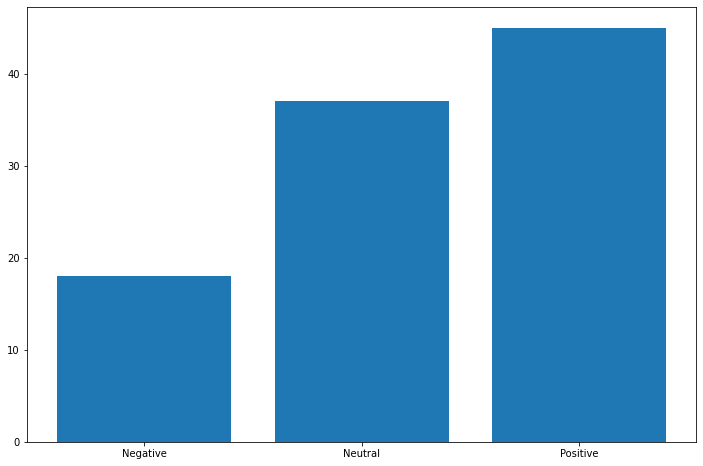

In [43]:
labels = df.groupby('Score').count().index.values

values = df.groupby('Score').size().values

plt.bar(labels, values)

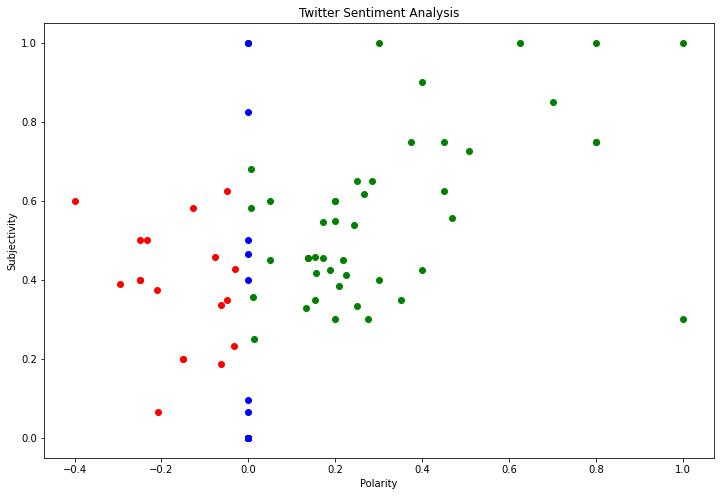

In [44]:
for index, row in df.iterrows():
    if row['Score'] == 'Positive':
        plt.scatter(row['Polarity'], row['Subjectivity'], color="green")
    elif row['Score'] == 'Negative':
        plt.scatter(row['Polarity'], row['Subjectivity'], color="red")
    elif row['Score'] == 'Neutral':
        plt.scatter(row['Polarity'], row['Subjectivity'], color="blue")

plt.title('Twitter Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
# add legend
plt.show()

In [45]:
objective = df[df['Subjectivity'] == 0]

print(str(objective.shape[0]/(df.shape[0])*100) + " % of objective tweets")

28.999999999999996 % of objective tweets


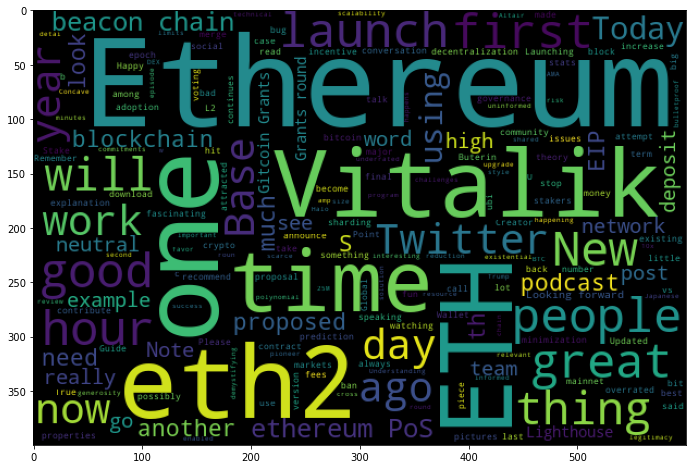

In [46]:
# Creating a word cloud
words = ' '.join([tweet for tweet in df['Tweet']])
wordCloud = WordCloud(width=600, height=400).generate(words)

plt.imshow(wordCloud)
plt.show()